In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# CSV 파일 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/Administrator/dataset/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
encoding_map = {'M': 0, 'F': 1, 'I': 2}

# Sex 열 인코딩
df['Sex'] = df['Sex'].map(encoding_map)

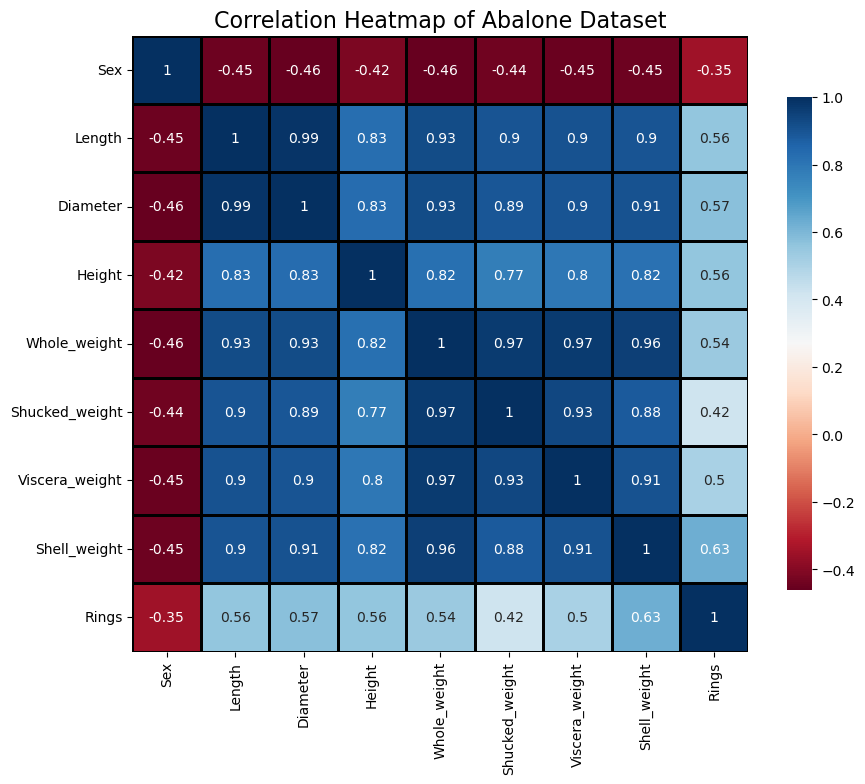

In [4]:
correlation_matrix = df.corr() # feature
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', square=True,
            linewidths=1, linecolor='black', cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Abalone Dataset', fontsize=16)
plt.show()

In [5]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [6]:
X = df.drop('Rings', axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [7]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [10]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.2583732057416268
[[ 0  3  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0 22  2  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 26 10  4  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25 23 18 31  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  8 46 49  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 26 73 21  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2 11 49 29 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 12 35 30 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3 27 26  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 17 12  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 13  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  5  9  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6  6  1  0  0  0  0  0  0  0  0  0  0  

In [11]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.26435406698564595
[[ 0  0  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 22  6  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 23 13  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19 31 24 22  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 10 50 41  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 30 58 28  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 15 32 40 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3 15 28 31 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  5 21 24 14  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  9 16 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  7 13  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  7  3  0  0  0  0  0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.2715311004784689
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6 10 10  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  6 20 11  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 20 30 30 13  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  2 15 46 37  8  2  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 20 59 35  3  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  5 40 36 18  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5  5 23 38 19  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  2 19 24 14  0  3  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  3 22 10  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4 11  2  0  6  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  9  4  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  7  2  0  2  0  0  1  0  0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.25717703349282295
[[ 1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7 11  9  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 19 12  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 22 31 31  7  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  1 15 47 23 17  5  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  7 29 36 32 10  2  6  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  5  5 28 34 21  6  2  0  1  2  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  5  7 25 32 20  1  4  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  4 14 19 16  6  4  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  6  6 13  5  2  1  0  0  1  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  6  3  6  2  0  2  2  2  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  4  6  1  1  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  2  4  1  1  0  2  1  1  0  1  0  0  0  0